# Import universal model

### import RAVEN universal model

In [13]:
# import RAVEN database

import pandas as pd
rxn_raven_df =pd.DataFrame(columns=['id', 'name','eccode','reversibility','subsystem','subsystemid'])

with open('Database\\keggrxn_fromRAVENnew.txt', 'r',encoding='utf-8-sig') as f:
    for line in f.readlines():
        spli = line.split('\t')
        if ";" in spli[4]:
            subsytem = spli[4].split(';')
            subsytemid = spli[5].split(';')
            for i in range(len(subsytem)):
                rxn_raven_df.loc[len(rxn_raven_df.index)]=[spli[0],spli[1],spli[2],spli[3],subsytem[i],subsytemid[i]]
        else:
            rxn_raven_df.loc[len(rxn_raven_df.index)]=spli
f.close()


In [14]:
# define function to print kegg rxn from RAVEN

def printRAVENrxn(keggid,rxn_raven_df=rxn_raven_df):
    search = rxn_raven_df[rxn_raven_df['id']==keggid]
    if len(search.index) == 0:
        print(keggid)
        print('     no rxn')
    else:
        print(keggid+': '+search.iloc[0]['name'])
        if search.iloc[0]['subsystemid'].strip() == '':
            print('     https://www.kegg.jp/entry/'+keggid)
        else:
            for i in range(len(search.index)):
                sysid = search.iloc[i]['subsystemid'].strip()
                sysname = search.iloc[i]['subsystem'].strip()
                print('     https://www.kegg.jp/pathway/%s+%s      %s'%(sysid,keggid,sysname))

# Compare model

In [2]:
import myModules.funBIGG2KEGG as fB2K

## Import model

In [1]:
org_name = 'mko'
org_full_name = 'Methylomonas_koyamae'

In [28]:
org_name = 'mbry'
org_full_name = 'Methylocystis_bryophila'

In [3]:
org_name = 'mca'
org_full_name = 'Methylococcus_capsulatus'

In [2]:
import cobra

In [6]:
new_model = cobra.Model(org_full_name)
new_model

Name,Methylomonas_koyamae
Memory address,23800c4c520
Number of metabolites,0
Number of reactions,0
Number of genes,0
Number of groups,0
Objective expression,0
Compartments,


In [10]:
pathwaytool_model = cobra.io.read_sbml_model(org_name+'\\automodel\\'+org_name+'_pathwaytool_model.xml')
pathwaytool_model

Missing lower flux bound set to '-1000.0' for reaction: '<Reaction RXN0__45__7139 "RXN0-7139">'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction RXN0__45__7139 "RXN0-7139">'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction ACSERLY__45__RXN "ACSERLY-RXN">'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction ACSERLY__45__RXN "ACSERLY-RXN">'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction RXN__45__16424 "RXN-16424">'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction RXN__45__16424 "RXN-16424">'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction _5__46__4__46__2__46__10__45__RXN "5.4.2.10-RXN">'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction _5__46__4__46__2__46__10__45__RXN "5.4.2.10-RXN">'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction RXN__45__12458 "RXN-12458">'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction RXN__45__12458 "RXN-12

Name,DSM21852
Memory address,219f2b57880
Number of metabolites,1743
Number of reactions,1616
Number of genes,876
Number of groups,0
Objective expression,0
Compartments,"CCO-CYTOSOL, CCO-IN, CCO-PERI-BAC, CCO-OUT, T, CCO-OUT-CCO-IN, CCO-MEMBRANE"


In [3]:
carveme_model = cobra.io.read_sbml_model(org_name+'\\automodel\\'+org_name+'_carveme_model.xml')
carveme_model

Name,mko_carveme_model
Memory address,1a85e6b2e20
Number of metabolites,1292
Number of reactions,1912
Number of genes,882
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [10]:
iMcBath_model = cobra.io.read_sbml_model('other_model\\iMcBath.xml')
iMcBath_model

http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
http://identifiers.org/inchi/ does not conform to 'http

Name,iMcBath
Memory address,23800c4c670
Number of metabolites,879
Number of reactions,913
Number of genes,730
Number of groups,0
Objective expression,1.0*BIOMASS_Mcapsulatus - 1.0*BIOMASS_Mcapsulatus_reverse_6a067
Compartments,"cytosol, extracellular, periplasm, inner membrane"


In [8]:
newmcamodel = cobra.io.read_sbml_model('other_model\\newmethylococcus_new.xml')
#newmcamodel.id = 'new_Methylococcus'
#cobra.io.write_sbml_model(newmcamodel,'other_model\\newmethylococcus_new.xml')

In [12]:
fB2K.printmyrxn(carveme_model,'Growth')

Growth , Biomass reaction
	 0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 0.0001 mql8_c + 0.001831 nad_c + 0.000447 nadp_c + 0.185265 phe__L_c + 0.221055 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.215792 ser__L_c + 0.004338 so4_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.253687 thr__L_c + 0.056843 trp__L_c + 0.137896 tyr__L_c + 0.1 uaagmda_c + 0.144104 utp_c + 0.423162 val__L_c + 0.000341 zn2_c -

In [11]:
fB2K.printmyrxn(iMcBath_model,'BIOMASS_Mcapsulatus')

BIOMASS_Mcapsulatus , BIOMASS_REACTION
	 3e-06 2ddg6p_c + 0.006 2pg_c + 0.00015 6pgc_c + 0.0001 accoa_c + 6e-08 adocbl_c + 0.576 ala__L_c + 0.00022 amet_c + 0.254 arg__L_c + 0.119 asn__L_c + 0.468 asp__L_c + 23.11185589 atp_c + 0.06986377 ca2_c + 0.001 cit_c + 0.21438646 cl_c + 3.15904e-06 clpn_MC_c + 0.00022 coa_c + 5.769e-05 cobalt2_c + 0.002 colipa_e + 0.00186552 cpoa2h_c + 0.04425885 ctp_c + 0.00151072 cu2_c + 0.038 cys__L_c + 0.00866366 datp_c + 0.01571821 dctp_c + 0.01446787 dgtp_c + 0.01282849 dpterol_c + 0.00882698 dttp_c + 0.003 f6p_c + 0.00022 fad_c + 0.001 fdp_c + 0.0059 fe2_c + 0.00022 fmn_c + 0.00022 fmnh2_c + 0.001 fum_c + 0.003 g3p_c + 0.002 g6p_c + 0.24977798 glc__D_c + 0.15 gln__L_c + 0.519 glu__L_c + 0.484 gly_c + 0.001 glyc_R_c + 0.00022 gthrd_c + 0.04084668 gtp_c + 17.77579456 h2o_c + 0.01558994 hdca_c + 0.104 his__L_c + 0.00179858 hpdca_c + 0.242 ile__L_c + 0.00016652 inost_c + 0.17647826 k_c + 0.00515564 lanost_c + 0.415 leu__L_c + 0.277 lys__L_c + 0.004 mal__L_c 

In [13]:
fB2K.printmyrxn(newmcamodel,'Biomass_reaction')

Biomass_reaction , Biomass Reaction
	 59.81 C00001_c + 59.8782 C00002_c + 0.0016027 C00003_c + 0.0016027 C00004_c + 0.00080136 C00005_c + 0.00080136 C00006_c + 0.0001763 C00010_c + 0.0001763 C00016_c + 0.0001763 C00019_c + 0.00080136 C00020_c + 0.01202 C00022_c + 0.004728 C00023_c + 8.0136e-05 C00024_c + 0.47739 C00025_c + 0.0001763 C00032_c + 0.53405 C00037_c + 0.53767 C00041_c + 0.0016027 C00042_c + 0.0642 C00044_c + 0.30138 C00047_c + 0.41952 C00049_c + 0.0001763 C00051_c + 0.0001763 C00061_c + 0.24352 C00062_c + 0.0604 C00063_c + 0.18083 C00064_c + 0.27727 C00065_c + 0.0080136 C00070_c + 0.14466 C00073_c + 0.0040068 C00074_c + 0.0604 C00075_c + 0.0080136 C00076_c + 0.086798 C00078_c + 0.23628 C00079_c + 0.16877 C00082_c + 0.0024041 C00085_c + 0.0016027 C00092_c + 0.036166 C00097_c + 0.0024041 C00118_c + 0.00080136 C00122_c + 0.31344 C00123_c + 0.0148 C00131_c + 0.10609 C00135_c + 0.23508 C00148_c + 0.0032055 C00149_c + 0.14346 C00152_c + 0.00080136 C00158_c + 0.00080136 C00175_c + 

### FBA

In [7]:
newmcamodel = cobra.io.read_sbml_model('other_model\\newmethylococcus_new.xml')
newmcamodel.reactions.EX_CH4.upper_bound = 0
newmcamodel.reactions.EX_CH4.lower_bound = -1000
newmcamodel.reactions.EX_O2.upper_bound = 0
newmcamodel.reactions.EX_O2.lower_bound = -100
#newmcamodel.reactions.EX_CH4.upper_bound = -2.9
solution = newmcamodel.optimize()
solution.objective_value

In [8]:
newmcamodel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
C00023_e,EX_C00023,0.005724,0,0.00%
C00070_e,EX_C00070,0.009702,0,0.00%
C00076_e,EX_C00076,0.009702,0,0.00%
C00175_e,EX_C00175,0.0009702,0,0.00%
C00305_e,EX_C00305,0.06791,0,0.00%
C01438_e,EX_CH4,86.03,0,0.00%
C00032_e,EX_Heme,0.0002134,0,0.00%
C00007_e,EX_O2,100,0,0.00%
C00009_e,EX_Pi,1.737,0,0.00%
C00088_e,EX_nitrite,11.14,0,0.00%


In [56]:
flux = solution.fluxes.sort_values(ascending=False)

In [77]:
result = pd.DataFrame(columns=['f','F_bio','F_AC','F_O2','F_CH4','F_CO2'])
for f in range(-1000,0,50):
    newmcamodel = cobra.io.read_sbml_model('other_model\\newmethylococcus_new.xml')
    newmcamodel.reactions.EX_O2.upper_bound = 0
    newmcamodel.reactions.EX_O2.lower_bound = f
    solution = newmcamodel.optimize()
    print(f,'\t',solution.objective_value,'\t',solution.fluxes['EX_Ac'])
    result.loc[len(result.index)]=[f,solution.objective_value,solution.fluxes['EX_Ac'],solution.fluxes['EX_O2'],solution.fluxes['EX_CH4'],solution.fluxes['EX_CO2']]


-1000 	 7.21658283124006 	 0.0
-950 	 7.216582831240033 	 0.0
-900 	 7.216582831240033 	 0.0
-850 	 7.216582831240033 	 0.0
-800 	 7.216582831240033 	 0.0
-750 	 7.216582831240033 	 0.0
-700 	 7.216582831240033 	 0.0
-650 	 7.216582831240033 	 0.0
-600 	 7.216582831240033 	 0.0
-550 	 6.954017414932511 	 0.022252855727784036
-500 	 6.31587204000225 	 0.0202107905280072
-450 	 5.6777266650719715 	 0.01816872532823031
-400 	 5.039581290141691 	 0.016126660128453412
-350 	 4.40143591521141 	 0.014084594928676513
-300 	 3.7632905402811385 	 0.012042529728899644
-250 	 3.125145165350863 	 0.010000464529122762
-200 	 2.48699979042059 	 0.007958399329345887
-150 	 1.848854415490306 	 0.005916334129568979
-100 	 1.2107090405600274 	 0.0038742689297920877
-50 	 0.5725636656297514 	 0.0018322037300152044


<AxesSubplot: xlabel='f'>

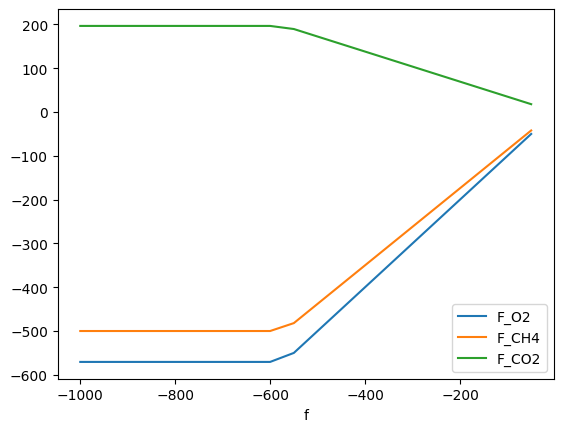

In [86]:
result.plot(x='f',y=['F_O2','F_CH4','F_CO2'])

<AxesSubplot: xlabel='f'>

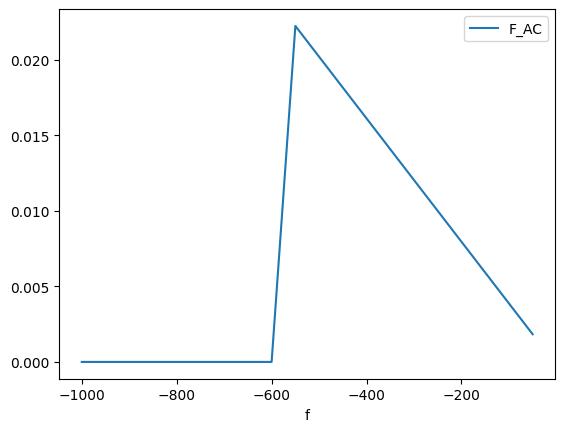

In [88]:
result.plot(x='f',y=['F_AC'])

In [57]:
prices = solution.shadow_prices.sort_values(ascending=False)

## compare universal rxn

In [17]:
unikegglist = list(set(KEGG_pathways_reactions['R_ID'].tolist()))
mappedinBIGG = [r for r in unikegglist if KEGG_BIGG_dir_selected.get(r)]
notmappedinBIGG = [r for r in unikegglist if not KEGG_BIGG_dir_selected.get(r)]

In [9]:
fB2K.comparemodel(mappedinBIGG,unikegglist)


both: 1383, only1: 0, only2: 6255


[['R00942',
  'R07660',
  'R05594',
  'R10395',
  'R06836',
  'R01648',
  'R01290',
  'R07125',
  'R08745',
  'R00658',
  'R04027',
  'R02273',
  'R04764',
  'R07015',
  'R01392',
  'R06868',
  'R01083',
  'R00891',
  'R02703',
  'R05598',
  'R02918',
  'R02948',
  'R04364',
  'R03217',
  'R00341',
  'R02734',
  'R10142',
  'R01155',
  'R03658',
  'R04143',
  'R01172',
  'R00748',
  'R01082',
  'R00078',
  'R02521',
  'R03663',
  'R05292',
  'R01560',
  'R01498',
  'R02150',
  'R05577',
  'R04109',
  'R02300',
  'R03313',
  'R03504',
  'R08572',
  'R05718',
  'R04378',
  'R01229',
  'R03508',
  'R08231',
  'R01394',
  'R00028',
  'R03404',
  'R01575',
  'R05699',
  'R05177',
  'R04638',
  'R02155',
  'R00497',
  'R04543',
  'R01148',
  'R04780',
  'R00525',
  'R00858',
  'R02294',
  'R03014',
  'R00187',
  'R00673',
  'R09827',
  'R09289',
  'R01398',
  'R04424',
  'R00233',
  'R01968',
  'R05048',
  'R03940',
  'R01763',
  'R08764',
  'R01737',
  'R05070',
  'R00357',
  'R00527',
  'R

In [20]:
#a = pathway_count(unikegglist)
#a.to_csv('KEGG\\Reaction_in_pathway_count.csv')

map01240 323 Biosynthesis of cofactors
map01220 243 Degradation of aromatic compounds
map01250 204 Biosynthesis of nucleotide sugars
map01200 200 Carbon metabolism
map00860 171 Porphyrin metabolism
map01230 163 Biosynthesis of amino acids
map00230 153 Purine metabolism
map00520 146 Amino sugar and nucleotide sugar metabolism
map00906 142 Carotenoid biosynthesis
map00950 138 Isoquinoline alkaloid biosynthesis
map00904 137 Diterpenoid biosynthesis
map00999 134 Biosynthesis of various plant secondary metabolites
map01210 130 2-Oxocarboxylic acid metabolism
map01232 130 Nucleotide metabolism
map01057 127 Biosynthesis of type II polyketide products
map00140 122 Steroid hormone biosynthesis
map00624 114 Polycyclic aromatic hydrocarbon degradation
map01212 110 Fatty acid metabolism
map00680 105 Methane metabolism
map00980 104 Metabolism of xenobiotics by cytochrome P450
map00627 103 Aminobenzoate degradation
map00270 102 Cysteine and methionine metabolism
map00380 101 Tryptophan metabolism
ma

In [10]:
a = pd.read_csv('KEGG\\Reaction_in_pathway_count.csv',index_col=0,squeeze=True)

C:\Users\vickenlee\AppData\Local\Temp\ipykernel_17092\2564500430.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  a = pd.read_csv('KEGG\\Reaction_in_pathway_count.csv',index_col=0,squeeze=True)


In [13]:
c = fB2K.pathway_count(notmappedinBIGG,a)

map00906 138 / 142 Carotenoid biosynthesis
map00904 137 / 137 Diterpenoid biosynthesis
map00950 134 / 138 Isoquinoline alkaloid biosynthesis
map00999 131 / 134 Biosynthesis of various plant secondary metabolites
map01057 126 / 127 Biosynthesis of type II polyketide products
map00860 123 / 171 Porphyrin metabolism
map00140 117 / 122 Steroid hormone biosynthesis
map00624 113 / 114 Polycyclic aromatic hydrocarbon degradation
map00980 103 / 104 Metabolism of xenobiotics by cytochrome P450
map00941 95 / 95 Flavonoid biosynthesis
map00520 94 / 146 Amino sugar and nucleotide sugar metabolism
map00627 94 / 103 Aminobenzoate degradation
map00361 86 / 86 Chlorocyclohexane and chlorobenzene degradation
map00909 82 / 87 Sesquiterpenoid and triterpenoid biosynthesis
map00901 81 / 82 Indole alkaloid biosynthesis
map00998 80 / 81 Biosynthesis of various antibiotics
map00524 76 / 77 Neomycin, kanamycin and gentamicin biosynthesis
map00380 76 / 101 Tryptophan metabolism
map00982 74 / 80 Drug metabolism

## compare org to bigg in uniKEGG

In [15]:
import pandas as pd
df_kegg_reaction  = pd.read_excel(org_name+'\\'+org_name+'_clean_kegg_reaction.xlsx', index_col=0) 
keggrxnlist=df_kegg_reaction['Kegg_ID'].tolist()

R_list = []
with open(org_full_name+'_genome\\R_list.txt','r') as f:
    for line in f.readlines():
        R_list.append(line.strip())
f.close()

print('kegg_rxn_list: '+str(len(keggrxnlist)))
print('R_list: '+str(len(R_list)))

kegg_rxn_list: 874
R_list: 934


In [52]:
mcakeggrxnlist=pd.read_excel('mca\\mca_clean_kegg_reaction.xlsx', index_col=0) ['Kegg_ID'].tolist()

In [108]:
kegglist = list(set(keggrxnlist+mcakeggrxnlist+mappedinBIGG))
for r in kegglist:
    string = r
    if r in keggrxnlist:
        string+=' yellow'
    else:
        string+=' white'
    if r in mcakeggrxnlist:
        string+=' pink'
    else:
        string+=' white'
    if r in mappedinBIGG:
        string+=' green'
    else:
        string+=' white'
    print(string)

R05030 white white green
R03665 yellow pink green
R03342 yellow pink green
R00943 yellow pink green
R07774 white pink white
R02281 white pink white
R10935 yellow pink white
R07483 white white green
R00816 white white green
R00187 white white green
R05661 white white green
R04405 yellow pink green
R04890 yellow white green
R04559 yellow pink green
R09746 yellow white white
R02098 yellow pink green
R04956 white pink white
R02670 yellow white white
R00190 yellow pink green
R00400 white white green
R03012 yellow pink white
R05775 white white green
R03896 yellow pink white
R05227 yellow white green
R07600 yellow white white
R00720 yellow pink green
R04998 yellow pink green
R07650 white pink white
R07503 white white green
R03404 white white green
R12427 yellow pink white
R06558 yellow pink white
R04785 white white green
R05705 white white green
R01034 white white green
R01802 white white green
R00610 white white green
R05970 white white green
R01662 white white green
R05052 yellow pink white

## build model

In [81]:
new_model = cobra.Model(org_full_name)
new_model

Name,Methylomonas_koyamae
Memory address,2381a207640
Number of metabolites,0
Number of reactions,0
Number of genes,0
Number of groups,0
Objective expression,0
Compartments,


### add in-cell rxn

In [82]:
kegg_in_bigg  = [KEGG_BIGG_dir_selected.get(r) for r in keggrxnlist if r in mappedinBIGG]
print('kegg_in_bigg: '+str(len(kegg_in_bigg)))

kegg_in_bigg: 520


In [83]:
def add_incell_rxn_from_unibigg(new_model,rxn_id,biggunimodel=biggunimodel):
    
    rxn = biggunimodel.reactions.get_by_id(rxn_id)
    cobra_reaction = cobra.Reaction(rxn_id)
    cobra_reaction.name = rxn.name
    cobra_reaction.lower_bound = rxn.lower_bound
    cobra_reaction.upper_bound = rxn.upper_bound

    metabolites_to_add = {}
    for metabolite, stoich in rxn.metabolites.items():
        id = metabolite.id
        name = metabolite.name
        compartment_id = id.split('_')[-1]
        if compartment_id in ['c','e','p','im']:
            compartment = compartment_id
        else:
            compartment = None
        metabolites_to_add[
                cobra.Metabolite(id, name=name, compartment=compartment)
            ] = stoich

    cobra_reaction.add_metabolites(metabolites_to_add)
    new_model.add_reactions([cobra_reaction])

In [84]:
for r in kegg_in_bigg:
    try:
        add_incell_rxn_from_unibigg(new_model,r)
    except:
        print(rxn.id)
        pass

Ignoring reaction 'MOAT2' since it already exists.
Ignoring reaction 'FBA' since it already exists.


In [85]:
def add_rxn_from_othermodel(new_model,rxn_id,drift_model):
    rxn = drift_model.reactions.get_by_id(rxn_id)
    cobra_reaction = cobra.Reaction(rxn_id)
    cobra_reaction.name = rxn.name
    cobra_reaction.lower_bound = rxn.lower_bound
    cobra_reaction.upper_bound = rxn.upper_bound
    metabolites_to_add = {}
    for metabolite, stoich in rxn.metabolites.items():
        id = metabolite.id
        name = metabolite.name
        compartment = metabolite.compartment
        metabolites_to_add[
                cobra.Metabolite(id, name=name, compartment=compartment)
            ] = stoich

    cobra_reaction.add_metabolites(metabolites_to_add)
    new_model.add_reactions([cobra_reaction])

In [86]:
ch4_Oxy_rxnlist1 = ['CH4trpp','MEOHtrpp','PMMOipp','MEOHDHipp','FALDtpp','FAEi','MTDBi','MCHi','FTR','FMFRDHi']
for r in ch4_Oxy_rxnlist1:
    add_rxn_from_othermodel(new_model,r,iMcBath_model)

In [87]:
fwdirxn = cobra.Reaction('FWDi')
fwdirxn.name = 'Formylmethanofuran:ferredoxin oxidoreductase'
fwdirxn.lower_bound = 0
fwdirxn.upper_bound = 1000
fwdirxn.add_metabolites({new_model.metabolites.get_by_id('co2_c'): -1.0,
                         new_model.metabolites.get_by_id('mfr_c'): -1.0,
                         new_model.metabolites.get_by_id('fdxrd_c'): -2.0,
                         new_model.metabolites.get_by_id('h_c'): -2.0,
                         new_model.metabolites.get_by_id('fdxo_2_2_c'): 2.0,
                         new_model.metabolites.get_by_id('h2o_c'): 1.0,
                         new_model.metabolites.get_by_id('formmfr_c'): 1.0,})
new_model.add_reactions([fwdirxn])


In [ ]:
rump_rxn_list =['HPS','AH6PI','PFK_ppi','TALA','FBA','TKT1','TKT2','RPE','RPI']
rumpO_rxn_list =['PGI',]

In [105]:
iMcBath_model.metabolites.get_by_id('6pgc_c')

Metabolite identifier,6pgc_c
Name,6-phosphonatooxy-D-gluconate
Memory address,0x2380817dd30
Formula,C6H10O10P
Compartment,c
In 4 reaction(s),"EDD, GND, PGL, BIOMASS_Mcapsulatus"


In [106]:
iMcBath_model.reactions.get_by_id('EDD')

Reaction identifier,EDD
Name,6-phosphogluconate dehydratase
Memory address,0x2380eab6700
Stoichiometry,6pgc_c --> 2ddg6p_c + h2o_c 6-phosphonatooxy-D-gluconate --> 2-dehydro-3-deoxy-6-phosphonato-D-gluconate(3-) + H2O
GPR,MCA0037
Lower bound,0.0
Upper bound,1000.0


In [71]:
printmyrxn(iMcBath_model,'TKT2')

TKT2 , Transketolase
	 f6p_c + g3p_c <=> e4p_c + xu5p_D_c
		 f6p_c 	 beta-D-fructofuranose 6-phosphate(2-) 	 -1.0
		 g3p_c 	 D-glyceraldehyde 3-phosphate 	 -1.0
		 e4p_c 	 D-erythrose 4-phosphate(2-) 	 1.0
		 xu5p_D_c 	 D-xylulose 5-phosphate(2-) 	 1.0


In [112]:
iMcBath_model.metabolites.get_by_id('ch4_c').annotation

{'bigg.metabolite': 'ch4',
 'biocyc': ['META:CH4', 'META:METHYL-GROUP'],
 'biopath': 'BIOPATH:Methane',
 'chebi': ['CHEBI:16183',
  'CHEBI:6811',
  'CHEBI:14585',
  'CHEBI:25220',
  'CHEBI:29434',
  'CHEBI:29438'],
 'hmdb': 'HMDB02714',
 'inchi': 'InChI=1S/CH4/h1H4',
 'kegg.compound': 'C01438',
 'metanetx.chemical': 'MNXM714',
 'seed.compound': 'cpd01024',
 'upa': 'UPA:UPC01438'}

In [111]:
biggunimodel.metabolites.get_by_id('ch4_c').annotation

{'kegg.compound': 'C01438',
 'chebi': ['CHEBI:14585',
  'CHEBI:16183',
  'CHEBI:25220',
  'CHEBI:29360',
  'CHEBI:29434',
  'CHEBI:29438',
  'CHEBI:6811'],
 'hmdb': 'HMDB02714',
 'biocyc': ['META:CH4', 'META:METHYL-GROUP'],
 'metanetx.chemical': 'MNXM714',
 'inchikey': 'VNWKTOKETHGBQD-UHFFFAOYSA-N',
 'seed.compound': ['cpd01024', 'cpd27447']}

In [109]:
new_model.reactions.get_by_id('BFBP')

Reaction identifier,BFBP
Name,"Beta-D-Fructose 1,6-bisphosphate 1-phosphohydrolase"
Memory address,0x2381a2936a0
Stoichiometry,"fdp_B_c + h2o_c --> f6p_B_c + pi_c Beta-D-Fructose 1,6-bisphosphate + H2O H2O --> Beta-D-Fructose 6-phosphate + Phosphate"
GPR,
Lower bound,0.0
Upper bound,1000.0


In [77]:
printmyrxn(new_model,'FBA')

KeyError: 'FBA'

In [114]:
new_model
cobra.io.write_sbml_model(new_model, org_full_name+'_genome\\'+org_full_name+'_model.xml')

### add ex rxn

In [35]:
needtoaddrxnlist = ['EX_ca2_e','EX_ch4_e','EX_cl_e','EX_cobalt2_e','EX_cu2_e','EX_fe2_e','EX_h_e','EX_h2o_e','EX_k_e','EX_mg2_e','EX_mn2_e','EX_na1_e','EX_no3_e','EX_ni2_e','EX_o2_e','EX_pi_e','EX_so4_e','EX_zn2_e','EX_co2_e']
for r in needtoaddrxnlist:
    rxn = iMcBath_model.reactions.get_by_id(r)
    new_model.add_reactions([rxn])

In [33]:
exrxnlist = [r for r in iMcBath_model.exchanges]

In [34]:
for exr in exrxnlist:
    print(exr.id,exr.name)

EX_ade_e adenine exchange
EX_aso3_e Arsenite exchange
EX_asp__L_e L-aspartate(1-) exchange
EX_ca2_e Ca(2+) exchange
EX_cd2_e Cadmium exchange
EX_ch4_e methane exchange
EX_cl_e Cl(-) exchange
EX_co2_e CO(2) exchange
EX_co_e CO exchange
EX_cobalt2_e Co(2+) exchange
EX_cu2_e Cu2+ exchange
EX_fald_e formaldehyde exchange
EX_fe2_e fe2_p exchange
EX_fol_e folate exchange
EX_fum_e fumarate(2-) exchange
EX_glyc_e Glycerol exchange
EX_gua_e guanine exchange
EX_h2o_e H2O exchange
EX_h_e H(+) exchange
EX_ham_e hydroxylamine exchange
EX_k_e K(+) exchange
EX_mal__L_e (S)-malate exchange
EX_meoh_e methanol exchange
EX_mg2_e Mg(2+) exchange
EX_mn2_e Manganese(2+) exchange
EX_n2_e N2 exchange
EX_n2o_e dinitrogen oxide exchange
EX_na1_e Na(+) exchange
EX_nh4_e Ammonium exchange
EX_ni2_e Nickel exchange
EX_no2_e nitrite exchange
EX_no3_e no3_e exchange
EX_no_e nitric oxide exchange
EX_o2_e dioxygen exchange
EX_orot_e orotate exchange
EX_pheme_e heme b exchange
EX_pi_e phosphate exchange
EX_ptrc_e putres

In [16]:
comparemodel(keggrxnlist,mappedinBIGG)

NameError: name 'comparemodel' is not defined

In [34]:
org_count=pathway_count(keggrxnlist)

map00230 69 Purine metabolism
map00790 42 Folate biosynthesis
map00240 41 Pyrimidine metabolism
map00061 41 Fatty acid biosynthesis
map00270 39 Cysteine and methionine metabolism
map00860 38 Porphyrin metabolism
map00520 38 Amino sugar and nucleotide sugar metabolism
map00680 37 Methane metabolism
map00620 30 Pyruvate metabolism
map00010 28 Glycolysis / Gluconeogenesis
map00030 24 Pentose phosphate pathway
map00330 24 Arginine and proline metabolism
map00260 24 Glycine, serine and threonine metabolism
map00970 23 Aminoacyl-tRNA biosynthesis
map00541 22 O-Antigen nucleotide sugar biosynthesis
map00720 22 Carbon fixation pathways in prokaryotes
map00400 21 Phenylalanine, tyrosine and tryptophan biosynthesis
map00250 20 Alanine, aspartate and glutamate metabolism
map00290 20 Valine, leucine and isoleucine biosynthesis
map00540 20 Lipopolysaccharide biosynthesis
map00630 19 Glyoxylate and dicarboxylate metabolism
map00020 19 Citrate cycle (TCA cycle)
map00564 18 Glycerophospholipid metabol

In [36]:
printbypathway(keggrxnlist,org_count)

map00230 69 Purine metabolism
      R02019
      R01049
      R01072
      R04144
      R04208
      R04560
      R04559
      R04591
      R01127
      R00191
      R00089
      R02017
      R00127
      R01083
      R01135
      R00183
      R00190
      R01547
      R02088
      R02297
      R01126
      R01560
      R00722
      R01130
      R01230
      R01132
      R01561
      R01227
      R02142
      R02719
      R01229
      R00332
      R01676
      R00336
      R03409
      R03409
      R02090
      R01857
      R01968
      R02147
      R00429
      R00434
      R00125
      R00529
      R00509
      R04463
      R00720
      R02720
      R02142
      R01562
      R02148
      R00087
      R01057
      R01054
      R01229
      R01547
      R02147
      R03530
      R00434
      R04378
      R01054
      R07404
      R07405
      R00191
      R01057
      R03531
      R00087
      R00426
      R01126
      R00131
      R06974
      R02088
      R01968
      R00330
      R0

In [35]:
color_compare(keggrxnlist,mappedinBIGG)

R01070 yellow pink
R00746 yellow pink
R00754 yellow pink
R00200 yellow pink
R00658 yellow pink
R01061 yellow pink
R01015 yellow pink
R04780 yellow pink
R02740 yellow pink
R00959 yellow pink
R03321 yellow pink
R02739 yellow pink
R01786 yellow pink
R01512 yellow pink
R01196 yellow pink
R00235 yellow pink
R01518 yellow pink
R00206 yellow pink
R00199 yellow pink
R00405 yellow pink
R00268 yellow pink
R00709 yellow pink
R01899 yellow pink
R01082 yellow pink
R01900 yellow pink
R01325 yellow pink
R00351 yellow pink
R00342 yellow pink
R00344 yellow pink
R05605 yellow pink
R01529 yellow pink
R01830 yellow pink
R01528 yellow pink
R02035 yellow pink
R02736 yellow pink
R02036 yellow pink
R01827 yellow pink
R08572 yellow pink
R00289 yellow pink
R00286 yellow pink
R01430 yellow pink
R00867 yellow pink
R01819 yellow pink
R01818 yellow pink
R05692 yellow pink
R00888 yellow pink
R00885 yellow pink
R02568 yellow pink
R00291 yellow pink
R01385 yellow pink
R07764 yellow pink
R04543 yellow pink
R04566 yello

### get rxn list

In [27]:
ptmodel_list=[r.id for r in pathwaytool_model.reactions]
carvemodel_list=[r.id for r in carveme_model.reactions]
carvemodel2R_list=[bigg2kegg(r.id) for r in carveme_model.reactions]
carvemodel2R_list_removeNone = list(filter(None, carvemodel2R_list))
imcbathmodel_list=[r.id for r in iMcBath_model.reactions]
newmcamodel_list=[r.id for r in newmcamodel.reactions]
print('ptmodel_list: '+str(len(ptmodel_list)))
print('carvemodel_list: '+str(len(carvemodel_list)))
print('carvemodel2R_list_removeNone: '+str(len(carvemodel2R_list_removeNone)))
print('imcbathmodel_list: '+str(len(imcbathmodel_list)))
print('newmcamodel_list: '+str(len(newmcamodel_list)))

ptmodel_list: 1616
carvemodel_list: 2327
carvemodel2R_list_removeNone: 647
imcbathmodel_list: 913
newmcamodel_list: 899


In [28]:
comparemodel(keggrxnlist,carvemodel2R_list_removeNone)

both: 392, only1: 588, only2: 243


[['R00710',
  'R00746',
  'R00754',
  'R00200',
  'R00658',
  'R01518',
  'R01061',
  'R01015',
  'R03321',
  'R01512',
  'R00341',
  'R00235',
  'R00711',
  'R00206',
  'R00199',
  'R00405',
  'R01082',
  'R01900',
  'R01325',
  'R00351',
  'R00342',
  'R01529',
  'R01830',
  'R01528',
  'R02035',
  'R02736',
  'R01827',
  'R08572',
  'R00289',
  'R00867',
  'R01819',
  'R01818',
  'R00885',
  'R02568',
  'R00291',
  'R01092',
  'R00955',
  'R01626',
  'R00742',
  'R04537',
  'R01280',
  'R01975',
  'R03026',
  'R01177',
  'R04748',
  'R04749',
  'R04745',
  'R04746',
  'R04743',
  'R04744',
  'R04741',
  'R04170',
  'R04740',
  'R04739',
  'R04737',
  'R04738',
  'R00238',
  'R02521',
  'R00256',
  'R00253',
  'R01398',
  'R01954',
  'R01086',
  'R00259',
  'R02649',
  'R03443',
  'R02283',
  'R00669',
  'R02282',
  'R00243',
  'R00355',
  'R02019',
  'R01072',
  'R04144',
  'R04325',
  'R04560',
  'R04559',
  'R04591',
  'R01127',
  'R00089',
  'R02017',
  'R00127',
  'R01083',
  'R

In [12]:
kegg2bigg_list = [kegg2bigg(r) for r in keggrxnlist]

NameError: name 'kegg2bigg' is not defined

In [39]:
replace_dict ={str(['FBAf', 'FBAm', 'FBAh']):'',str(['PDHam1hi', 'PDHam1mi']):'',str(['ACCAHh', 'ACCAHm']):'',str(['FGFTh', 'FGFTm']):''}
kegg2bigg_list2 = [replace_dict[str(i)] if str(i) in replace_dict else i for i in kegg2bigg_list]
kegg2bigg_list = kegg2bigg_list2
kegg2bigg_list_removeNone = list(filter(None, kegg2bigg_list))
print('kegg2bigg_list_removeNone: '+str(len(kegg2bigg_list_removeNone)))

kegg2bigg_list_removeNone: 577


In [50]:
notmappedtoBIGG =[]
mappedtoBIGG =[]
mapped_dir = {}
for i in range(len(kegg2bigg_list)):
    mapped_dir.update({keggrxnlist[i]:kegg2bigg_list[i]})
    print(keggrxnlist[i],kegg2bigg_list[i])
    if kegg2bigg_list[i] == ''or kegg2bigg_list[i] == None:
        notmappedtoBIGG.append(keggrxnlist[i])
    else:
        mappedtoBIGG.append(keggrxnlist[i])
print('notmappedtoBIGG: '+str(len(notmappedtoBIGG)))
print('mappedtoBIGG: '+str(len(mappedtoBIGG)))

R01070 
R00710 ALDD2x
R00746 ALCD2y
R00754 ALCD2x
R00014 
R03270 None
R02569 None
R00200 PYK
R00658 ENO
R01518 PGM
R01061 GAPD
R01015 TPI
R04779 None
R02740 PGIA
R00959 PGCM
R03321 G6PI3
R01600 None
R02739 G6PI_1
R01786 GLUKA
R07618 None
R01512 PGK
R09127 None
R00341 PPCK
R00235 ACS
R00711 ALDD2y
R02073 None
R00206 PPDK
R00199 PPS
R00621 None
R03316 None
R02570 None
R00405 SUCOAS
R00268 r0082
R01899 r0422
R01082 FUM
R01900 ACONTb
R01325 ACONTa
R00351 CS
R00342 MDH
R02164 None
R01049 None
R01641 None
R01056 None
R01529 RPE
R01830 TKT2
R01528 GND
R02035 PGL
R02736 G6PBDH
R01827 TALA
R01057 None
R08572 GLYCK2
R01621 None
R10221 None
R00289 GALUi
R00286 UDPGD
R02630 None
R00867 HEX7
R01819 MPAKI
R01818 PMANM
R00888 GMAND
R00885 MAN1PT
R02568 FBA2
R03397 None
R03236 PFK_2
R00291 UDPG4E
R01105 None
R01092 GALKr
R00955 UGLT
R02957 ALDD32
R01385 UGE
R07765 None
R07764 3HAD180
R07762 None
R07763 None
R04968 None
R04726 None
R04963 None
R04960 None
R04957 None
R04952 None
R04969 None
R04543 3OAR

In [46]:
a=pathway_count(keggrxnlist)

map00230 68 Purine metabolism
map00860 51 Porphyrin metabolism
map00061 50 Fatty acid biosynthesis
map00240 37 Pyrimidine metabolism
map00790 36 Folate biosynthesis
map00270 36 Cysteine and methionine metabolism
map00680 35 Methane metabolism
map00520 34 Amino sugar and nucleotide sugar metabolism
map00620 33 Pyruvate metabolism
map00630 32 Glyoxylate and dicarboxylate metabolism
map00720 30 Carbon fixation pathways in prokaryotes
map00280 29 Valine, leucine and isoleucine degradation
map00010 28 Glycolysis / Gluconeogenesis
map00260 26 Glycine, serine and threonine metabolism
map00564 26 Glycerophospholipid metabolism
map00970 22 Aminoacyl-tRNA biosynthesis
map00330 22 Arginine and proline metabolism
map00400 22 Phenylalanine, tyrosine and tryptophan biosynthesis
map00071 21 Fatty acid degradation
map00640 21 Propanoate metabolism
map00250 21 Alanine, aspartate and glutamate metabolism
map00541 20 O-Antigen nucleotide sugar biosynthesis
map00670 20 One carbon pool by folate
map00650 1

In [52]:
b=pathway_count(notmappedtoBIGG,a)

map00061 32 / 50 Fatty acid biosynthesis
map00680 17 / 35 Methane metabolism
map00564 17 / 26 Glycerophospholipid metabolism
map00860 17 / 51 Porphyrin metabolism
map00280 15 / 29 Valine, leucine and isoleucine degradation
map00520 14 / 34 Amino sugar and nucleotide sugar metabolism
map00790 12 / 36 Folate biosynthesis
map00620 11 / 33 Pyruvate metabolism
map00550 11 / 18 Peptidoglycan biosynthesis
map00630 11 / 32 Glyoxylate and dicarboxylate metabolism
map00030 10 / 19 Pentose phosphate pathway
map00270 10 / 36 Cysteine and methionine metabolism
map00640 10 / 21 Propanoate metabolism
map00906 10 / 11 Carotenoid biosynthesis
map00380 9 / 19 Tryptophan metabolism
map00010 9 / 28 Glycolysis / Gluconeogenesis
map00230 9 / 68 Purine metabolism
map00650 9 / 19 Butanoate metabolism
map00907 9 / 9 Pinene, camphor and geraniol degradation
map00730 8 / 11 Thiamine metabolism
map00130 8 / 10 Ubiquinone and other terpenoid-quinone biosynthesis
map00780 8 / 16 Biotin metabolism
map00920 8 / 19 Su

In [48]:
color_compare(mappedtoBIGG,keggrxnlist)

R00710 yellow pink
R00746 yellow pink
R00754 yellow pink
R00200 yellow pink
R00658 yellow pink
R01518 yellow pink
R01061 yellow pink
R01015 yellow pink
R02740 yellow pink
R00959 yellow pink
R03321 yellow pink
R02739 yellow pink
R01786 yellow pink
R01512 yellow pink
R00341 yellow pink
R00235 yellow pink
R00711 yellow pink
R00206 yellow pink
R00199 yellow pink
R00405 yellow pink
R00268 yellow pink
R01899 yellow pink
R01082 yellow pink
R01900 yellow pink
R01325 yellow pink
R00351 yellow pink
R00342 yellow pink
R01529 yellow pink
R01830 yellow pink
R01528 yellow pink
R02035 yellow pink
R02736 yellow pink
R01827 yellow pink
R08572 yellow pink
R00289 yellow pink
R00286 yellow pink
R00867 yellow pink
R01819 yellow pink
R01818 yellow pink
R00888 yellow pink
R00885 yellow pink
R02568 yellow pink
R03236 yellow pink
R00291 yellow pink
R01092 yellow pink
R00955 yellow pink
R02957 yellow pink
R01385 yellow pink
R07764 yellow pink
R04543 yellow pink
R04566 yellow pink
R04964 yellow pink
R04534 yello

In [53]:
printbypathway(notmappedtoBIGG,b,mapped_dir)

map00061 32 Fatty acid biosynthesis
      R07765
      R07762
      R07763
      R04968
      R04726
      R04963
      R04960
      R04957
      R04952
      R04969
      R04966
      R04724
      R04961
      R04958
      R04955
      R04429
      R04428
      R04533
      R07639
      R02767
      R01403
      R02768
      R00390
      R10208
      R01404
      R04970
      R04967
      R04725
      R04962
      R04959
      R04956
      R04430
map00680 17 Methane metabolism
      R07136
      R00473
      R01256
      R01142
      R09518
      R01146
      R03464
      R03390
      R08060
      R03015
      R08059
      R08058
      R09099
      R00756
      R10935
      R11039
      R11040
map00564 17 Glycerophospholipid metabolism
      R01800
      R02241
      R12241
      R01312
      R02052
      R03416
      R03417
      R01799
      R02747
      R02055
      R04864
      R02746
      R02056
      R01797
      R09072
      R09073
      R02027
map00860 17 Porphyrin metabolism

In [49]:
c=pathway_count(mappedtoBIGG,a)

map00230 59 / 68 Purine metabolism
map00240 35 / 37 Pyrimidine metabolism
map00860 34 / 51 Porphyrin metabolism
map00270 26 / 36 Cysteine and methionine metabolism
map00720 26 / 30 Carbon fixation pathways in prokaryotes
map00790 24 / 36 Folate biosynthesis
map00260 23 / 26 Glycine, serine and threonine metabolism
map00620 22 / 33 Pyruvate metabolism
map00630 21 / 32 Glyoxylate and dicarboxylate metabolism
map00970 20 / 22 Aminoacyl-tRNA biosynthesis
map00400 20 / 22 Phenylalanine, tyrosine and tryptophan biosynthesis
map00520 20 / 34 Amino sugar and nucleotide sugar metabolism
map00250 19 / 21 Alanine, aspartate and glutamate metabolism
map00670 19 / 20 One carbon pool by folate
map00010 19 / 28 Glycolysis / Gluconeogenesis
map00680 18 / 35 Methane metabolism
map00061 18 / 50 Fatty acid biosynthesis
map00071 17 / 21 Fatty acid degradation
map00760 17 / 19 Nicotinate and nicotinamide metabolism
map00330 16 / 22 Arginine and proline metabolism
map00770 16 / 17 Pantothenate and CoA biosy

map00230    59
map00240    35
map00860    34
map00270    26
map00720    26
            ..
map00450     1
map00402     1
map00901     1
map00621     1
map00405     1
Length: 87, dtype: int64

### compare by Bigg

In [43]:
comparemodel(kegg2bigg_list_removeNone ,carvemodel_list)

both: 335, only1: 193, only2: 1373


[['FBA',
  'PYK',
  'ENO',
  'GAPD',
  'TPI',
  'PGK',
  'POR_syn',
  'ACS',
  'PGM',
  'PPDK',
  'SUCOAS',
  'ICDHx',
  'FUM',
  'ACONTb',
  'ACONTa',
  'CS',
  'MDH',
  'EDA',
  'RPE',
  'TKT2',
  'GND',
  'PGL',
  'G6PBDH',
  'EDD',
  'TALA',
  'GALUi',
  'HEX7',
  'PMANM',
  'MAN1PT',
  'FBA2',
  'SUCR',
  'UDPG4E',
  'ACCOAC',
  '3HAD80',
  'FACOAL160',
  'CHRPL',
  'GLNS',
  'ARGSS',
  'ARGSL',
  'ACGS',
  'ACGK',
  'AGPR',
  'ACOTA',
  'ACODA',
  'ORNTAC',
  'ASPTA',
  'RNDR2',
  'GLUPRT',
  'AICART',
  'ADSL2r',
  'PRASCSi',
  'IMPC',
  'ADNCYC',
  'RNDR1',
  'ADK1',
  'ADSL1r',
  'ADSS',
  'NTD7',
  'ADPT',
  'NTD6',
  'PUNP7',
  'NTD11',
  'NDPK9',
  'IMPD',
  'GMPS',
  'HXPRT',
  'PUNP1',
  'NTD9',
  'XPPT',
  'NTD10',
  'GK1',
  'GUAD',
  'PPGPPDP',
  'DGK1',
  'NDPK5',
  'NTD8',
  'PUNP3',
  'GTPDPK',
  'AP4AH',
  'SADT',
  'ADSK',
  'NTPP9',
  'NTPP11',
  '3NTD7pp',
  '3NTD9pp',
  'DADK',
  'PDE1',
  'NTPP10',
  'NTPP6',
  'NTPP2',
  'GART',
  'NDPK1',
  'NDPK8',
  'ADNK1

### compare by KEGG

In [136]:
color_compare(keggrxnlist,R_list)

R01070 yellow pink
R00710 yellow pink
R00746 yellow pink
R00754 yellow pink
R00014 yellow pink
R03270 yellow pink
R02569 yellow pink
R00200 yellow pink
R00658 yellow pink
R01518 yellow pink
R01061 yellow pink
R01015 yellow pink
R04779 yellow pink
R02740 yellow pink
R00959 yellow pink
R03321 yellow pink
R01600 yellow pink
R02739 yellow pink
R01786 yellow pink
R07618 yellow pink
R01512 yellow pink
R09127 yellow pink
R00341 yellow pink
R00235 yellow pink
R00711 yellow pink
R02073 yellow pink
R00206 yellow pink
R00199 yellow pink
R00621 yellow pink
R03316 yellow pink
R02570 yellow pink
R00405 yellow pink
R00268 yellow pink
R01899 yellow pink
R01082 yellow pink
R01900 yellow pink
R01325 yellow pink
R00351 yellow pink
R00342 yellow pink
R02164 yellow pink
R01049 yellow pink
R01641 yellow pink
R01056 yellow pink
R01529 yellow pink
R01830 yellow pink
R01528 yellow pink
R02035 yellow pink
R02736 yellow pink
R01827 yellow pink
R01057 yellow pink
R08572 yellow pink
R01621 yellow pink
R10221 yello

In [137]:
pathway_count(comparemodel(keggrxnlist,R_list)[2])

both: 977, only1: 3, only2: 125
map01200 28 Carbon metabolism
map00980 20 Metabolism of xenobiotics by cytochrome P450
map01210 14 2-Oxocarboxylic acid metabolism
map01240 14 Biosynthesis of cofactors
map01230 12 Biosynthesis of amino acids
map00983 11 Drug metabolism - other enzymes
map00966 8 Glucosinolate biosynthesis
map00680 8 Methane metabolism
map00720 7 Carbon fixation pathways in prokaryotes
map00020 7 Citrate cycle (TCA cycle)
map00982 7 Drug metabolism - cytochrome P450
map00010 5 Glycolysis / Gluconeogenesis
map00620 4 Pyruvate metabolism
map00710 4 Carbon fixation in photosynthetic organisms
map00940 4 Phenylpropanoid biosynthesis
map01232 3 Nucleotide metabolism
map00240 3 Pyrimidine metabolism
map00760 3 Nicotinate and nicotinamide metabolism
map00250 2 Alanine, aspartate and glutamate metabolism
map00520 2 Amino sugar and nucleotide sugar metabolism
map00909 2 Sesquiterpenoid and triterpenoid biosynthesis
map00670 2 One carbon pool by folate
map00830 2 Retinol metabolis

map01200    28
map00980    20
map01210    14
map01240    14
map01230    12
map00983    11
map00966     8
map00680     8
map00720     7
map00020     7
map00982     7
map00010     5
map00620     4
map00710     4
map00940     4
map01232     3
map00240     3
map00760     3
map00250     2
map00520     2
map00909     2
map00670     2
map00830     2
map00650     2
map00400     2
map00625     2
map00572     2
map00230     2
map00860     2
map01250     2
map00998     1
map00770     1
map00633     1
map00030     1
map01051     1
map00780     1
map00908     1
map00640     1
map00960     1
map00541     1
map00981     1
map00565     1
map00627     1
map00333     1
map00290     1
map01053     1
map00330     1
map00790     1
map00531     1
map00220     1
map00270     1
map00660     1
map00460     1
map00622     1
map01220     1
map00440     1
map00310     1
map00311     1
dtype: int64

In [44]:
[innewmoodel,delinmodel,addinmodel]=comparemodel(keggrxnlist,newmcamodel_list)

both: 650, only1: 211, only2: 249


In [110]:
pathway_count(delinmodel)

map01240 38 Biosynthesis of cofactors
map00970 23 Aminoacyl-tRNA biosynthesis
map00230 17 Purine metabolism
map00790 14 Folate biosynthesis
map01232 14 Nucleotide metabolism
map00500 11 Starch and sucrose metabolism
map00860 10 Porphyrin metabolism
map00240 8 Pyrimidine metabolism
map00620 6 Pyruvate metabolism
map00561 6 Glycerolipid metabolism
map00061 6 Fatty acid biosynthesis
map00480 5 Glutathione metabolism
map00270 5 Cysteine and methionine metabolism
map01200 5 Carbon metabolism
map00010 5 Glycolysis / Gluconeogenesis
map00130 5 Ubiquinone and other terpenoid-quinone biosynthesis
map00470 5 D-Amino acid metabolism
map00730 5 Thiamine metabolism
map00020 5 Citrate cycle (TCA cycle)
map00680 5 Methane metabolism
map00760 4 Nicotinate and nicotinamide metabolism
map00785 4 Lipoic acid metabolism
map00520 4 Amino sugar and nucleotide sugar metabolism
map00920 4 Sulfur metabolism
map00946 4 Degradation of flavonoids
map01040 4 Biosynthesis of unsaturated fatty acids
map00260 4 Glyci

map01240    38
map00970    23
map00230    17
map00790    14
map01232    14
            ..
map00630     1
map00350     1
map00623     1
map00541     1
map00450     1
Length: 72, dtype: int64

In [45]:
pathway_count(addinmodel)

map00250 7 Alanine, aspartate and glutamate metabolism
map00670 4 One carbon pool by folate
map00460 4 Cyanoamino acid metabolism
map00561 3 Glycerolipid metabolism
map00710 3 Carbon fixation in photosynthetic organisms
map00100 3 Steroid biosynthesis
map00061 3 Fatty acid biosynthesis
map00220 3 Arginine biosynthesis
map00620 3 Pyruvate metabolism
map00680 2 Methane metabolism
map00290 2 Valine, leucine and isoleucine biosynthesis
map00500 2 Starch and sucrose metabolism
map00760 2 Nicotinate and nicotinamide metabolism
map00450 2 Selenocompound metabolism
map00380 2 Tryptophan metabolism
map00230 2 Purine metabolism
map00627 2 Aminobenzoate degradation
map00910 2 Nitrogen metabolism
map00590 2 Arachidonic acid metabolism
map00740 2 Riboflavin metabolism
map00630 1 Glyoxylate and dicarboxylate metabolism
map00520 1 Amino sugar and nucleotide sugar metabolism
map00920 1 Sulfur metabolism
map00564 1 Glycerophospholipid metabolism
map00541 1 O-Antigen nucleotide sugar biosynthesis
map003

map00250    7
map00670    4
map00460    4
map00561    3
map00710    3
map00100    3
map00061    3
map00220    3
map00620    3
map00680    2
map00290    2
map00500    2
map00760    2
map00450    2
map00380    2
map00230    2
map00627    2
map00910    2
map00590    2
map00740    2
map00630    1
map00520    1
map00920    1
map00564    1
map00541    1
map00360    1
map00260    1
map00480    1
map00330    1
map00270    1
map00909    1
map00860    1
map00340    1
map00770    1
map01057    1
map00720    1
dtype: int64

In [65]:
for r in delinmodel:
    printRAVENrxn(r)

R00746: Ethanol:NADP+ oxidoreductase
     https://www.kegg.jp/pathway/rn00010+R00746      Glycolysis / Gluconeogenesis
     https://www.kegg.jp/pathway/rn00620+R00746      Pyruvate metabolism
R03270: 
     https://www.kegg.jp/pathway/rn00010+R03270      Glycolysis / Gluconeogenesis
     https://www.kegg.jp/pathway/rn00020+R03270      Citrate cycle (TCA cycle)
     https://www.kegg.jp/pathway/rn00620+R03270      Pyruvate metabolism
R02569: acetyl-CoA:enzyme N6-(dihydrolipoyl)lysine S-acetyltransferase
     https://www.kegg.jp/pathway/rn00010+R02569      Glycolysis / Gluconeogenesis
     https://www.kegg.jp/pathway/rn00020+R02569      Citrate cycle (TCA cycle)
     https://www.kegg.jp/pathway/rn00620+R02569      Pyruvate metabolism
R07618: enzyme N6-(dihydrolipoyl)lysine:NAD+ oxidoreductase
     https://www.kegg.jp/pathway/rn00010+R07618      Glycolysis / Gluconeogenesis
     https://www.kegg.jp/pathway/rn00020+R07618      Citrate cycle (TCA cycle)
     https://www.kegg.jp/pathway/rn0028

In [47]:
for r in addinmodel:
    try:
        printurl(r)
        print('\n')
    except:
        pass

https://www.kegg.jp/kegg-bin/show_pathway?map=map00450&multi_query=R09372+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00760&multi_query=R07410+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00760&multi_query=R07407+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00740&multi_query=R07280+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00590&multi_query=R07035+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00590&multi_query=R07034+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00740&multi_query=R05705+yellow
https://www.kegg.jp/kegg-bin/show_pathway?map=map01057&multi_query=R05705+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00100&multi_query=R05639+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00627&multi_query=R05591+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00670&multi_query=R04326+yellow


https://www.kegg.jp/kegg-bin/show_pathway?map=map00230&multi_query=R04325+yellow
https://

In [48]:
for r in addinmodel:
    printmyrxn(newmcamodel,r)

Starch_synthesis , Starch Synthesis Reaction
	 C00498_c --> C00008_c + C00369_c
		 C00498_c 	 Adenosine diphosphoglucose 	 -1.0
		 C00008_c 	 Adenosine 5'-diphosphate 	 1.0
		 C00369_c 	 Starch 	 1.0
Starch_degredation , Starch Degredation Reaction
	 C00009_c + C00369_c --> C00103_c
		 C00369_c 	 Starch 	 -1.0
		 C00009_c 	 Phosphoric acid 	 -1.0
		 C00103_c 	 D-Glucose 1-phosphate 	 1.0
Rspont2 , Spontanous Reaction
	 C01165_c <=> C00001_c + C00080_c + C03912_c
		 C01165_c 	 L-Glutamate gamma-semialdehyde 	 -1.0
		 C00001_c 	 water 	 1.0
		 C00080_c 	 Hydron 	 1.0
		 C03912_c 	 1-Pyrroline-5-carboxylate 	 1.0
RPG161161 , Phosphatidylglycerol Synthesis Reaction
	 C00001_c + C00005_c + C00063_c + C00093_c + C00111_c + 2.0 C08362_c --> C00006_c + C00009_c + C00013_c + C00055_c + CPG161161_c
		 C00001_c 	 water 	 -1.0
		 C00093_c 	 D-Glycerol 1-phosphate 	 -1.0
		 C00111_c 	 3-Hydroxy-2-oxopropyl phosphate 	 -1.0
		 C00063_c 	 Cytidine triphosphate 	 -1.0
		 C08362_c 	 (9Z)-Hexadecenoicac